In [1]:
#convolution : image smoothing (lowpass)

import cv2
import numpy as np
img = cv2.imread('lena.png')
rows, cols = img.shape[:2]
kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])
kernel_3x3 = np.ones((3,3), np.float32) / 9.0 # Divide by 9 to normalize the kernel
kernel_5x5 = np.ones((5,5), np.float32) / 25.0 # Divide by 25 to normalize the kernel
cv2.imshow('Original', img)
# value -1 is to maintain source image depth
output = cv2.filter2D(img, -1, kernel_identity)
cv2.imshow('Identity filter', output)
output = cv2.filter2D(img, -1, kernel_3x3)
cv2.imshow('3x3 filter', output)
output = cv2.filter2D(img, -1, kernel_5x5)
cv2.imshow('5x5 filter', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
#convolution : image sharping

import cv2
import numpy as np
img = cv2.imread('sakura.jpg')
assert img is not None
cv2.imshow('Original', img)
# generating the kernels
kernel_sharpen_1 = np.array([
    [-1,-1,-1], 
    [-1, 9,-1], 
    [-1,-1,-1]])
kernel_sharpen_2 = np.array([
    [1, 1,1], 
    [1,-7,1], 
    [1, 1,1]])
kernel_sharpen_3 = np.array([
    [-1,-1,-1,-1,-1],
    [-1, 2, 2, 2,-1],
    [-1, 2, 8, 2,-1],
    [-1, 2, 2, 2,-1],
    [-1,-1,-1,-1,-1]]) / 8.0
# applying different kernels to the input image
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)
cv2.imshow('Sharpening', output_1)
cv2.imshow('Excessive Sharpening', output_2)
cv2.imshow('Edge Enhancement', output_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

AssertionError: 

In [4]:
#morphological filter

import cv2
import numpy as np

img0 = cv2.imread('morphology_cell.png', cv2.IMREAD_GRAYSCALE)
retval, img = cv2.threshold(img0, 225, 255, cv2.THRESH_BINARY)
#Square Kernel
#kernel = np.ones((5, 5), np.uint8)
#Elliptical Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
"""
kernel = np.array(
         [[0, 0, 1, 0, 0],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1],
          [0, 0, 1, 0, 0]], dtype=np.uint8)
"""
print(kernel)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Input', img)
cv2.imshow('Erosion', img_erosion)
cv2.imshow('Dilation', img_dilation)
cv2.imshow('Opening', img_opening)
cv2.imshow('Closing', img_closing)
cv2.waitKey()
cv2.destroyAllWindows()

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


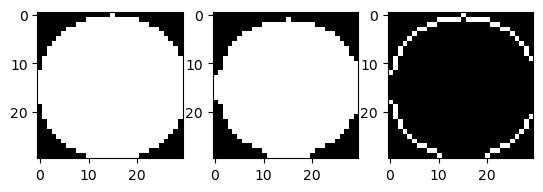

In [5]:
#gear tooth inspection using morphological filter

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gear_tooth.png', cv2.IMREAD_GRAYSCALE)
retval, img_a = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY)

kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)
kernel_hole_ring = kernel_hole - kernel_hole_e
plt.subplot(1,3,1)
plt.imshow(kernel_hole, cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(kernel_hole_e, cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(kernel_hole_ring, cmap = 'gray')

img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1)
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)
img_d = cv2.bitwise_or(img, img_c)

cv2.imshow('(a)', img_a)
cv2.imshow('(b)', img_b)
cv2.imshow('(c)', img_c)
cv2.imshow('(d)', img_d)

cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
#gear tooth inspection using morphological filter
# 擦 removing morphological filter 的齒樽檢測

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gear_tooth.png', cv2.IMREAD_GRAYSCALE)

retval, img_a = cv2.threshold(img, 225, 255, cv2.THRESH_BINARY)#值切割，將圖像轉換成二元圖像
kernel_dot = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)

kernel_hole_ring = kernel_hole - kernel_hole_e# 建立圓環

# 在原圖中找圓環
img_b = cv2.erode(img_a, kernel_hole_ring, iterations=1)
img_c = cv2.dilate(img_b, kernel_hole, iterations=1)

img_d = cv2.bitwise_or(img, img_c)# 合併圖像
img_d_inv = 255 - img_d# 反轉圖像
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(90,90))# 在反轉的圖像中查找圓環

# 建立大圓
kernel_hole_e = cv2.erode(kernel_hole, kernel_dot, iterations=1)#去除造點
kernel_hole_ring = kernel_hole - kernel_hole_e#建圓環
img_1 = cv2.erode(img_d_inv, kernel_hole_ring, iterations=1)#在原圖像中找圓環
img_B = cv2.dilate(img_1, kernel_hole, iterations=1)#針對圓環做大擴張，填滿形成大圓

# 調整參數,讓圓環變得更小
kernel_hole = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(85,85))

# 建立小圓
img_S = cv2.dilate(img_1, kernel_hole, iterations=1)

# 計算圓環的 XOR
img_e = cv2.bitwise_xor(img_B, img_S)

# 執行閥值切割
retval, img_e = cv2.threshold(img_e, 127, 255, cv2.THRESH_BINARY)

# 計算兩個二進制圖像的 AND
img_f = cv2.bitwise_and(img_d, img_e)

# 顯示所有圖像
cv2.imshow('(a)', img_a)
cv2.imshow('(b)', img_b)
cv2.imshow('(c)', img_c)
cv2.imshow('(d)', img_d)
cv2.imshow('(e)', img_e)
cv2.imshow('(f)', img_f)

cv2.waitKey()
cv2.destroyAllWindows()

###### %%writefile test
## Practice (Morphological Filter)
1. Input image from gear_tooth.png.
2. The objective is to detect missing teeth using a sequence of morphological filters.
3. Optional: Design a set of structure elements: <b>gear_body</b>, <b>sampling_ring_spacer</b>, <b>sampling_ring_width</b>, <b>tip_spacing</b>, <b>defect_cue</b>
4. Apply morphological filters using the structure elements to generate the figures (e), (f), (g), (h)
<br>&nbsp;(e) opening it with structure element <b>gear_body</b> to get rid of the teeth, dilating that with structure element <b>sampling_ring_spacer</b> to bring it out to the base of the teeth, dilating that with the structure element <b>sampling_ring_width</b> to bring the next image out to the tip of the teeth, and subtracting the last two results to get a ring that just fits over the teeth.
<br>&nbsp;(f) AND it with the original image to produce an image of just the teeth.
<br>&nbsp;(g) (optional) dilating the teeth image with the structure element <b>tip_spacing</b> produces the solid ring image which has spaces in the solid ring wherever there are defects in the teeth.
<br>&nbsp;(h) (optional) subtracting it from the sampling ring leaves only the defects, which are dilated by structure element <b>defect_cue</b>.
5. (optional) Mark the defected gears using <b>red rectangles</b> on the output images.
6. Write a simple report in a separate cell.
7. Upload your Jupyter code file (*.ipynb)
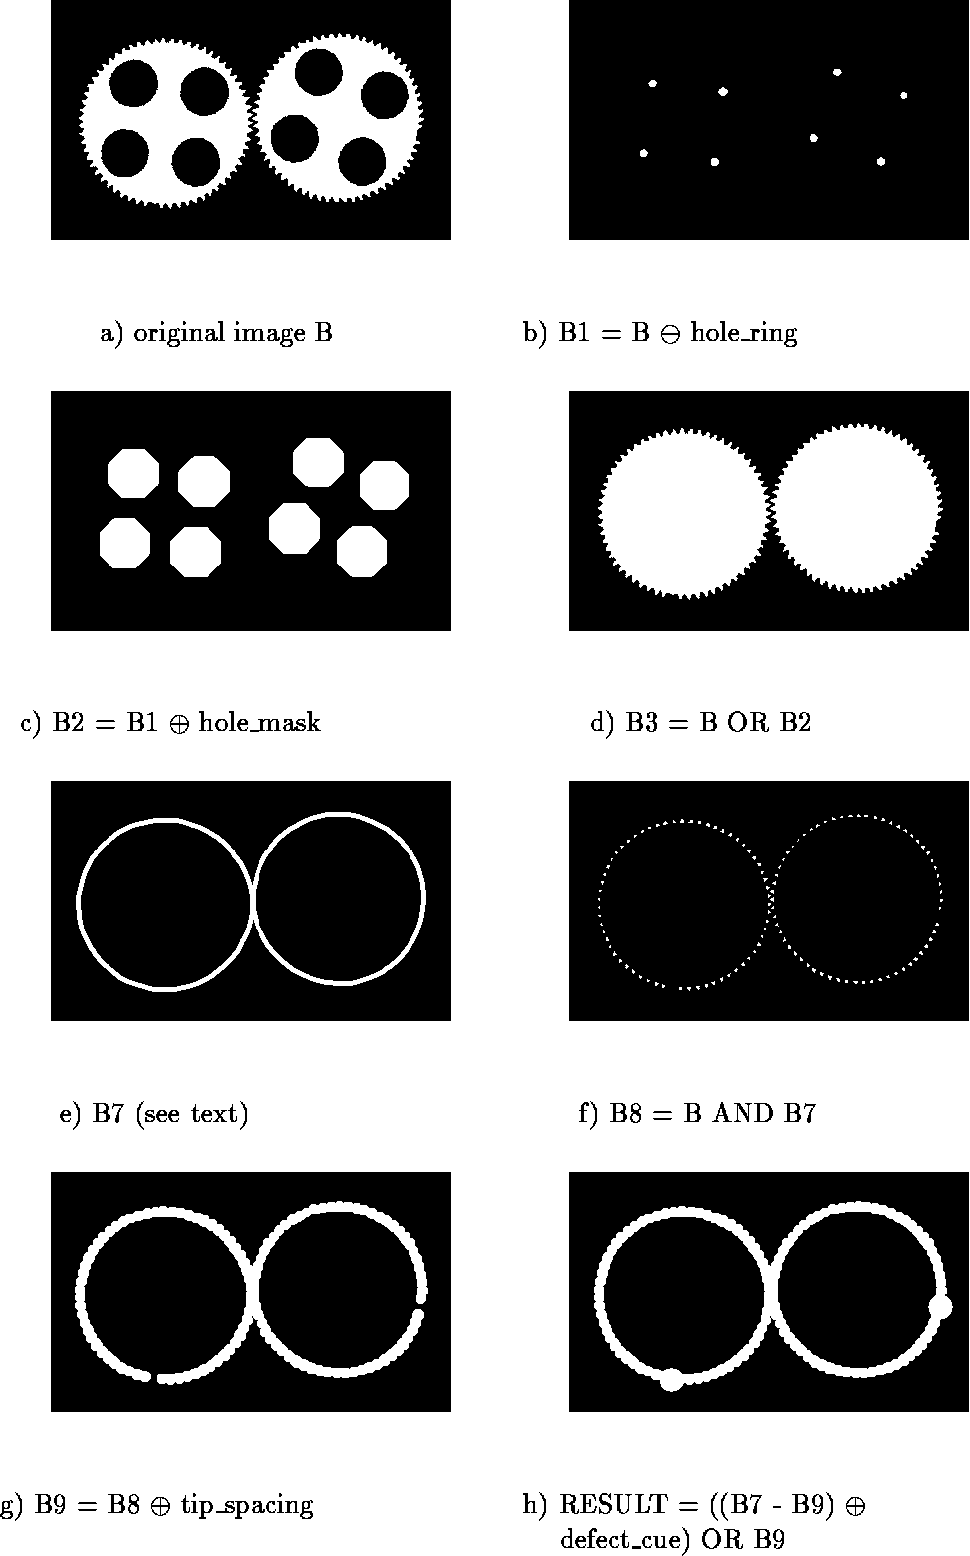

## Homework 2
1. Input image from eos_map_x.png.
2. Try to detect the location of the <b>player</b> (in cyan color), and the location of the nearest <b>shrine</b> (in red color). (hint: use <i>inRange()</i>)
3. Try to detect the facing direction of the <b>player</b>. (hint: possibly use <i>morphologyEx()</i>, or <i>findContours(), minEnclosingTriangle()</i> to determine the player axis)
4. Draw a yellow line indicating the facing direction of the <b>player</b>.
5. Draw a yellow line from the <b>player</b> to the <b>shrine</b>.
4. Compute the required <b>rotating angle</b> so the player is facing to the shrine. 
(positive angle means clockwise rotation, negative angle means counterclockwise rotaion) (hint: use <i>atan2()</i>)
5. Print the rotating angle on top-left corner of the output images. (in degree, not radian)
6. Write a simple report in a separate cell.
7. Upload your Jupyter code file (*.ipynb)

input1 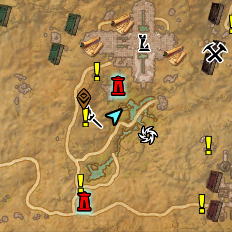

output1 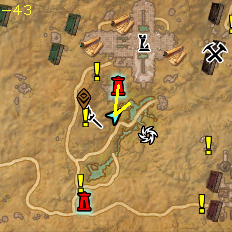

input2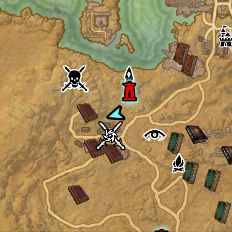

output2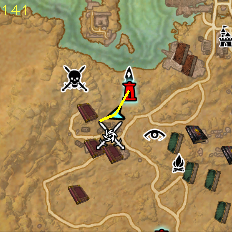

input3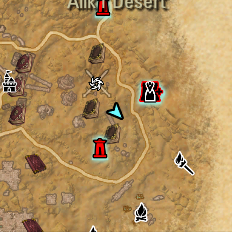

output3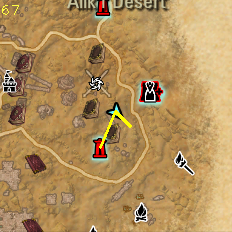

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

class Player():
    def __init__(self, p1, p2, p3): #(左邊點，右邊點，頂點)
        self.p1 = p1
        self.p2 = p2
        self.top = p3
        self.mid = ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2) # 線段的中點
        self.len = math.sqrt(math.pow((p1[0]-p2[0]),2) + math.pow((p1[1]-p2[1]),2)) # 線段的長度

def get_distance(p1, p2):
    return math.sqrt(math.pow((p1[0]-p2[0]),2) + math.pow((p1[1]-p2[1]),2))

def get_angle_degree(x, y):
        return math.degrees(math.atan2(-y, x))

def process_image(img):
    # 將影像從 BGR 轉換為 HSV 色彩空間
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    
    # 藍綠色遮罩範圍
    cyan_mask = cv2.inRange(hsv_img, (78, 100, 46), (99, 255, 255)) 
    # 找到玩家輪廓
    player_contours, _ = cv2.findContours(cyan_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    # 紅色標籤遮罩範圍
    red_mask = cv2.inRange(hsv_img, (0, 43, 143), (0, 255, 255))
    # 找到神殿輪廓
    shrine_contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    
    player = max(player_contours, key=cv2.contourArea) 
    area, trg1 = cv2.minEnclosingTriangle(player)
    
    # 根據最小外接三角形來獲取玩家方向
    lineA = Player(trg1[0][0], trg1[1][0], trg1[2][0])
    lineB = Player(trg1[0][0], trg1[2][0], trg1[1][0])
    lineC = Player(trg1[1][0], trg1[2][0], trg1[0][0])

    # 找出 AB、BC、CA 中最短的線段（三角形的底）
    base = lineA if lineA.len < lineB.len else lineB
    base = base if base.len < lineC.len else lineC
    # 斜率 = Δy / Δx
    d = (base.top[1] - base.mid[1]) / (base.top[0] - base.mid[0]) 
    # Δx 是正還是負，與尋找 x 軸的起始點有關。d 被視為 d/1，即 x 移動 1 個單位，y 移動 d 個單位。
    t = 1 if (base.top[0] - base.mid[0]) >= 0 else -1 
    # 從底的中點開始，沿著軸移動，找到凹點。因為形狀相同，3.5 是我測試的一個可以找到凹點的參數。
    start = (base.mid[0] + t * 3.5, base.mid[1] + t * 3.5 * d) 
    # 繪製玩家方向，從起點到沿著軸 20 個像素的點
    cv2.line(img, np.intp(start), np.intp((start[0] + t * 20, start[1] + t * 20 * d)), (0, 255, 255), 2) 

    min = math.inf
    for contour in shrine_contours: 
        area = cv2.contourArea(contour) 
        if area < 30: continue
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
        temp = Player(start, (x + w/2, y + h/2), (0, 0)) 
        if temp.len < min: 
            min = temp.len
            des = (x + w/2, y + h/2) # 堡壘的中心點為目的地。  
    # 將玩家與堡壘連線
    cv2.line(img, np.intp(start), np.intp(des), (0, 255, 255), 2) 
    
    deg1 = get_angle_degree(base.top[0] - start[0], base.top[1] - start[1]) # 玩家方向與 X 軸夾角
    deg2 = get_angle_degree(des[0] - start[0], des[1] - start[1]) # 連線與 X 軸夾角
    
    if deg1 * deg2 >= 0: # 二者同向
        degree = abs(deg2 - deg1) # 角度差
        if deg1 > 0: # 老師要求之方向與數學上定義相反，故若原本為負的話，abs 就有變號了，不用動。原本為正，要變號。
            degree = degree * -1
    elif deg1 < 0: # 1 在第三第四象限
        # 1 往 2 逆時針轉的角度
        degree = deg2 - deg1 
        # 若超過 180，改成順時針
        if degree > 180:
            degree = 360 - degree
        else:
            degree = degree * -1 # 逆時針為負
    else: # 2 在第三第四象限
        # 1 往 2 順時針轉的角度
        degree = deg1 - deg2
        # 若超過 180，改成逆時針
        if degree > 180: 
            degree = degree - 360
    
    # 在圖像上顯示旋轉角度
    cv2.putText(img, str(int(degree)), (0, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 1, cv2.LINE_AA) 
    return img

img_1 = cv2.imread('input1.png')
img_2 = cv2.imread('input2.png')
img_3 = cv2.imread('input3.png')

cv2.imshow('result1', process_image(img_1))
cv2.imshow('result2', process_image(img_2))
cv2.imshow('result3', process_image(img_3))

cv2.waitKey(0)
cv2.destroyAllWindows()
